In [1]:
import pandas as pd
import numpy as np

# Import SQL Alchemy
from sqlalchemy import create_engine

# # Import and establish Base for which classes will be constructed 
from sqlalchemy.ext.declarative import declarative_base
Base = declarative_base()

# # Import modules to declare columns and column data types
from sqlalchemy import Column, Integer, String, Float

In [2]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
from datetime import datetime 
from datetime import timedelta

In [3]:
engine = create_engine("sqlite:///hawaii.sqlite")
Base = automap_base()

In [4]:
Base.prepare(engine, reflect=True)

In [5]:
Base.classes.keys()

['measurements', 'stations']

In [6]:
session = Session(engine)

In [7]:
Measurements = Base.classes.measurements
Stations = Base.classes.stations

In [8]:
Measurements.__dict__

mappingproxy({'__doc__': None,
              '__init__': <function __init__>,
              '__mapper__': <Mapper at 0x1139ad7f0; measurements>,
              '__module__': 'sqlalchemy.ext.automap',
              '__table__': Table('measurements', MetaData(bind=None), Column('id', INTEGER(), table=<measurements>, primary_key=True, nullable=False), Column('station', VARCHAR(), table=<measurements>), Column('date', VARCHAR(length=255), table=<measurements>), Column('prcp', FLOAT(), table=<measurements>), Column('tobs', INTEGER(), table=<measurements>), schema=None),
              '_sa_class_manager': <ClassManager of <class 'sqlalchemy.ext.automap.measurements'> at 1139abdb0>,
              'date': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x1139fe048>,
              'id': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x1139abeb8>,
              'prcp': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x1139fe0f8>,
              'station': <sqlalchemy.orm.attributes.In

In [9]:
Stations.__dict__

mappingproxy({'__doc__': None,
              '__init__': <function __init__>,
              '__mapper__': <Mapper at 0x10d8d9550; stations>,
              '__module__': 'sqlalchemy.ext.automap',
              '__table__': Table('stations', MetaData(bind=None), Column('id', INTEGER(), table=<stations>, primary_key=True, nullable=False), Column('station', VARCHAR(), table=<stations>), Column('name', VARCHAR(), table=<stations>), Column('latitude', FLOAT(), table=<stations>), Column('longitude', FLOAT(), table=<stations>), Column('elevation', FLOAT(), table=<stations>), schema=None),
              '_sa_class_manager': <ClassManager of <class 'sqlalchemy.ext.automap.stations'> at 1139fe200>,
              'elevation': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x1139fe678>,
              'id': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x1139fe2b0>,
              'latitude': <sqlalchemy.orm.attributes.InstrumentedAttribute at 0x1139fe518>,
              'longitude': <sqla

In [10]:
session.query(Measurements).all()

 ...]

In [11]:
session.query(Stations).all()

In [12]:
first_row = session.query(Measurements).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x11051a208>,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65}

### Precipitation Analysis

* Design a query to retrieve the last 12 months of precipitation data.

* Select only the `date` and `prcp` values.

* Load the query results into a Pandas DataFrame and set the index to the date column.

* Plot the results using the DataFrame `plot` method.

<center><img src='images/precip.png' /></center>

* Use Pandas to print the summary statistics for the precipitation data.

In [13]:
# datetime.now().strftime()
# datetime.today()
# timedelta(days=365)

In [14]:
prev_yr=datetime.today()-timedelta(days=365)
string_prev_yr = prev_yr.strftime('%Y-%m-%d')

In [15]:
prcpanalyze = (session
               .query(Measurements.date, Measurements.prcp)
               .filter(Measurements.date >= string_prev_yr)
               .all()
              )
newdf = pd.DataFrame(data=prcpanalyze)
newdf.head(15)

,date,prcp
0,2017-04-07,0.00
1,2017-04-08,0.00
2,2017-04-09,0.00
3,2017-04-10,0.00
4,2017-04-11,0.00
5,2017-04-12,0.00
6,2017-04-13,0.00
7,2017-04-14,0.26
8,2017-04-15,0.01
9,2017-04-16,0.00


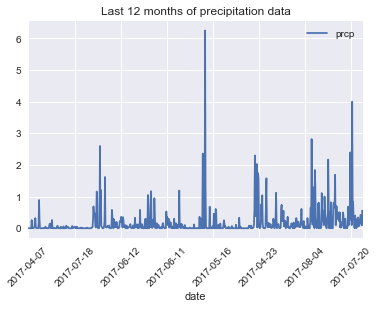

In [35]:
newdf.set_index('date')
import matplotlib.pyplot as plt
import seaborn as sns
newdf.plot(x='date',x_compat=True)
# plt.figsize(10,6)
plt.xticks(rotation='45')
plt.title('Last 12 months of precipitation data')
sns.set()
plt.show()
plt.savefig('Precipitation Data')

### Station Analysis

* Design a query to calculate the total number of stations.

* Design a query to find the most active stations.

  * List the stations and observation counts in descending order

  * Which station has the highest number of observations?

* Design a query to retrieve the last 12 months of temperature observation data (tobs).

  * Filter by the station with the highest number of observations.

  * Plot the results as a histogram with `bins=12`.

  <center><img src='images/temp_hist.png' height="400px" /></center>

In [23]:
stationscount= (session.query(Measurements.station)
                .group_by(Measurements.station)
                .count())
stationscount

9

In [24]:
from sqlalchemy import func

(session
 .query(Measurements.station, func.count(Measurements.station))
 .group_by(Measurements.station)
 .order_by(func.count(Measurements.station).desc())
 .all())

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [52]:
tobs = (session
        .query(Measurements.station, Measurements.date, Measurements.tobs)
        .filter(Measurements.date >= string_prev_yr)
        .filter(Measurements.station=='USC00519281')
        .all())
tobsdf = pd.DataFrame(data=tobs)
tobsdf.head()

,station,date,tobs
0,USC00519281,2017-04-07,74
1,USC00519281,2017-04-08,77
2,USC00519281,2017-04-09,78
3,USC00519281,2017-04-10,67
4,USC00519281,2017-04-11,70


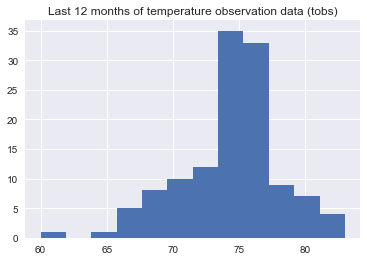

In [58]:
import matplotlib.pyplot as plt
tobsdf.tobs.hist(bins=12)
plt.title('Last 12 months of temperature observation data (tobs)')
plt.show()
plt.savefig('TOBS Data for Most Active Station USC00519281')

In [56]:
# all_stationtobs = (session
#         .query(Measurements.station, Measurements.date, Measurements.tobs)
#         .filter(Measurements.date >= string_prev_yr)
#         .all())
# all_stationtobsdf = pd.DataFrame(data=tobs)
# all_stationtobsdf

In [57]:
# import matplotlib.pyplot as plt
# all_stationtobsdf.tobs.hist(bins=12)
# plt.title('Last 12 months of temperature observation data (tobs)')
# plt.show()
# plt.savefig('TOBS Data')

### Temperature Analysis

* Write a function called `calc_temps` that will accept a start date and end date in the format `%Y-%m-%d` and return the minimum, average, and maximum temperatures for that range of dates.

* Use the `calc_temps` function to calculate the min, avg, and max temperatures for your trip using the matching dates from the previous year (i.e. use "2017-01-01" if your trip start date was "2018-01-01")

* Plot the min, avg, and max temperature from your previous query as a bar chart.

  * Use the average temperature as the bar height.

  * Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).

<center><img src='images/temp_avg.png' height="400px"/></center>

In [28]:
calc_temps = (session
               .query(Measurements.date, func.max(Measurements.tobs), func.min(Measurements.tobs), func.avg(Measurements.tobs))
               .filter(Measurements.date >= string_prev_yr)
               .all()
              )
# new_calc = [each for each in calc_temps]
calc_temps

[('2017-04-30', 87, 58, 76.43328748280605)]

In [29]:
calc_t = pd.DataFrame(data=calc_temps, columns=['date','max','min','ave'])
calc_t

,date,max,min,ave
0,2017-04-30,87,58,76.433287


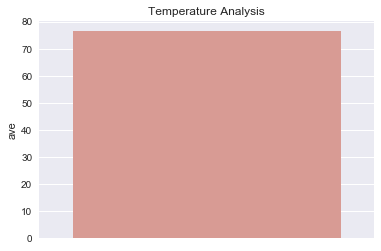

In [47]:
import seaborn as sns
sns.barplot(y='ave', data=calc_t, color="salmon", saturation=.5)
# plt.errorbar(x='date',y='ave')
# plt.xticks(rotation='')
plt.title('Temperature Analysis')
plt.show()
plt.savefig('Temperature Analysis')